## Group 5 Assignment
###  Azeez Okikiola Lawal (Azokiki1996@gmail.com)
###  Bashir Olasubomi Muhammed  (Muhbashir234@gmail.com)
###  Khayrah Dosunmu  (khayrahdosunmu@gmail.com)
###  K Mubasherin (kmubasherin8@gmail.com)
###  Moyahabo Muriel Rabothata (murielmoyahabo@gmail.com) 
###  Naima Ally Mbwana (naima.mbwana31@gmail.com) same person as Naymie Alliy
###  Niyyat Kederalah Idris  (Niyyatkt@gmail.com)
###  Ogechukw Benedicta Odobulu (ogeben7@gmail.com)


# 

### Importing libraries and loading the Covid-19 dataset

In [1]:
### import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the COVID-19 dataset
# Replace with the path to the file
file_path = None

covid_data = pd.read_csv('full_grouped.csv')

# List of countries for your group - replace with the list for your group
group_five = ('Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines','Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda',
'Saint Kitts and Nevis', 'Saint Lucia','Saint Vincent and the Grenadines', 'San Marino','Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia','Somalia', 'South Africa', 'South Korea', 'South Sudan', 'Spain')

# Filter the COVID-19 data for the countries assigned to your group
group_data = covid_data[covid_data['Country/Region'].isin(group_five)]

# Display the filtered data for Group Five
group_data

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
129,2020-01-22,Panama,0,0,0,0,0,0,0,Americas
130,2020-01-22,Papua New Guinea,0,0,0,0,0,0,0,Western Pacific
131,2020-01-22,Paraguay,0,0,0,0,0,0,0,Americas
132,2020-01-22,Peru,0,0,0,0,0,0,0,Americas
133,2020-01-22,Philippines,0,0,0,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
35122,2020-07-27,Somalia,3196,93,1543,1560,18,0,22,Eastern Mediterranean
35123,2020-07-27,South Africa,452529,7067,274925,170537,7096,298,9848,Africa
35124,2020-07-27,South Korea,14203,300,13007,896,28,1,102,Western Pacific
35125,2020-07-27,South Sudan,2305,46,1175,1084,43,1,0,Africa


In [3]:
#Check the dimension of the data
group_data.shape

(5452, 10)

### Data Cleaning:

#### Missing Values

1. Are there any missing values in the dataset? If so, how are they handled?
2. Are there any inconsistencies or anomalies in the data that need to be addressed?



In [4]:
#Checking for Missing Values

missing_values = group_data.isnull().sum()
missing_values

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

There are no missing values in our dataset. However if they were present, depending on the no of missing values present, we can do one of the following:
- Remove rows with missing values (advisable if there are not many)
- Replace the missing value with the mean/median/mode of the column if is a numeric value
- Replace the value with the mode of the column in categorical valiables


In [5]:
#The below code can be used to drop missing values when there are any
group_data = group_data.dropna()

#### Data Anomalies

In [6]:
# Descriptive statistics for numerical columns
print(group_data.describe())

           Confirmed        Deaths      Recovered         Active  \
count    5452.000000   5452.000000    5452.000000    5452.000000   
mean    26494.770360    967.200660   15029.396735   10498.172964   
std     85418.097352   3985.589852   53538.279935   32626.299561   
min         0.000000      0.000000       0.000000       0.000000   
25%         2.000000      0.000000       0.000000       0.000000   
50%       395.500000      4.000000      29.000000     163.000000   
75%     10133.500000    129.000000    2298.000000    4002.500000   
max    816680.000000  28752.000000  602249.000000  245382.000000   

          New cases   New deaths  New recovered  
count   5452.000000  5452.000000    5452.000000  
mean     499.320616    14.776412     341.686537  
std     1573.539564    87.588576    1304.807302  
min        0.000000 -1918.000000  -15564.000000  
25%        0.000000     0.000000       0.000000  
50%        5.000000     0.000000       0.000000  
75%      197.000000     3.000000     

Another way to do data cleaning is to remove duplicate rows and check that column types are correct

In [7]:
# Check and removeduplicate rows
group_data = group_data.drop_duplicates()

In [8]:
#Data is still the same shape (No missing and duplicates values)
group_data.shape

(5452, 10)

In [9]:
# Pearson correlation coefficient to check data anomaly and feature correlations
correlation_matrix = group_data.corr()
correlation_matrix



,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Confirmed,1.000000,0.643282,0.977281,0.935818,0.735457,0.376485,0.791488
Deaths,0.643282,1.000000,0.615036,0.552757,0.316049,0.338108,0.324723
Recovered,0.977281,0.615036,1.000000,0.842508,0.622846,0.322455,0.731840
Active,0.935818,0.552757,0.842508,1.000000,0.864812,0.415230,0.831591
New cases,0.735457,0.316049,0.622846,0.864812,1.000000,0.476825,0.795529
New deaths,0.376485,0.338108,0.322455,0.415230,0.476825,1.000000,0.406931
New recovered,0.791488,0.324723,0.731840,0.831591,0.795529,0.406931,1.000000


### Grouping:

1. What is the total number of confirmed cases, deaths, and recoveries for each country in the dataset?
2. How does the distribution of COVID-19 cases vary across different countries?



In [10]:
# Cases by country/region
df_counts = group_data.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

# Display the resulting DataFrame
print(df_counts)

                      Country/Region  Confirmed   Deaths  Recovered
0                             Panama    2378126    51756    1213644
1                   Papua New Guinea       1185        2        695
2                           Paraguay     156373     1663      75800
3                               Peru   19263916   652113   10862846
4                        Philippines    2972611   110892     785042
5                             Poland    2755525   118018    1465856
6                           Portugal    3855363   146603    1809966
7                              Qatar    6377607     7123    4676443
8                            Romania    2363132   140031    1409409
9                             Russia   45408411   619385   25120448
10                            Rwanda      71242      169      36974
11             Saint Kitts and Nevis       1772        0       1295
12                       Saint Lucia       2236        0       1860
13  Saint Vincent and the Grenadines       2771 

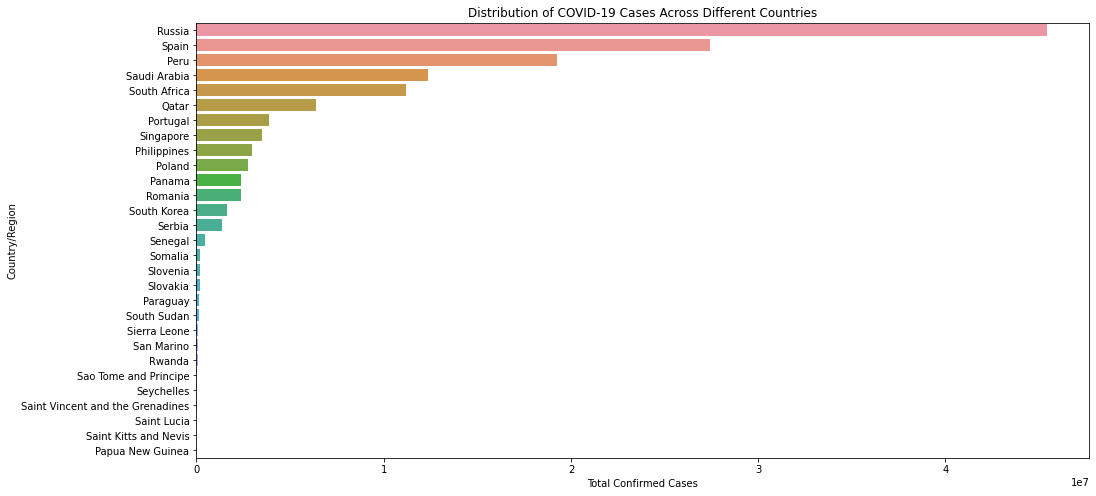

In [11]:
# Plotting the distribution of COVID-19 cases across different countries
plt.figure(figsize=(16, 8))
sns.barplot(x='Confirmed', y='Country/Region', data=df_counts.sort_values('Confirmed', ascending=False))
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country/Region')
plt.title('Distribution of COVID-19 Cases Across Different Countries')
plt.show()


 ### Pivot Tables:

1. Can you create a pivot table to show the total number of confirmed cases, deaths, and recoveries for each date and country?



In [12]:
pivot_table_data = group_data.pivot_table(
    values=['Confirmed', 'Deaths', 'Recovered'],
    index=['Date', 'Country/Region'],
    aggfunc='sum'
).reset_index()

# Display the pivot table
print(pivot_table_data)

            Date    Country/Region  Confirmed  Deaths  Recovered
0     2020-01-22            Panama          0       0          0
1     2020-01-22  Papua New Guinea          0       0          0
2     2020-01-22          Paraguay          0       0          0
3     2020-01-22              Peru          0       0          0
4     2020-01-22       Philippines          0       0          0
...          ...               ...        ...     ...        ...
5447  2020-07-27           Somalia       3196      93       1543
5448  2020-07-27      South Africa     452529    7067     274925
5449  2020-07-27       South Korea      14203     300      13007
5450  2020-07-27       South Sudan       2305      46       1175
5451  2020-07-27             Spain     272421   28432     150376

[5452 rows x 5 columns]


### Time Series Analysis:

1. How has the number of confirmed cases changed over time for each country?
2. Are there any noticeable trends or patterns in the data?



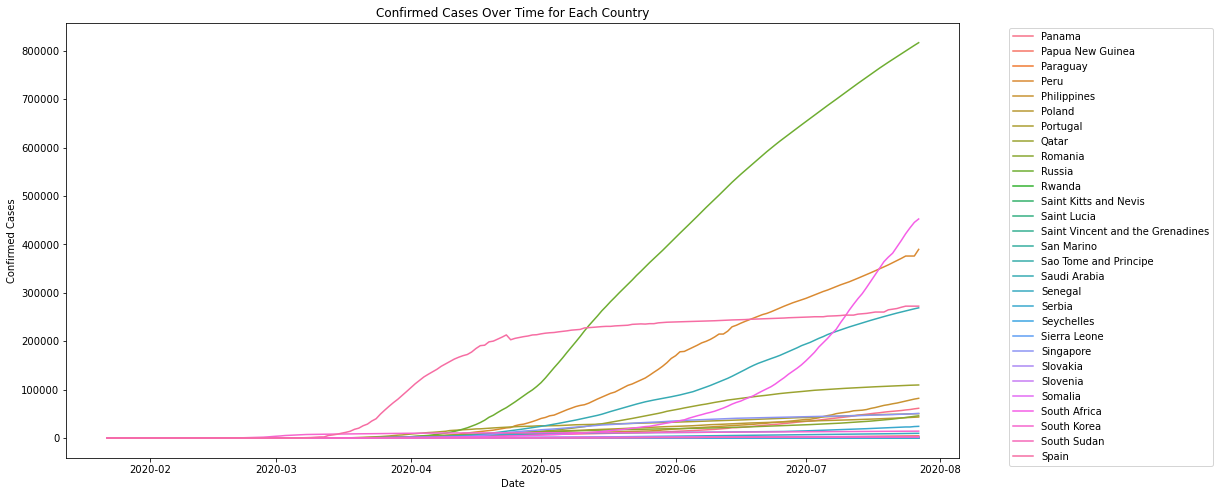

In [13]:
# Plotting with seaboarn
group_data['Date'] = pd.to_datetime(group_data['Date'])
plt.figure(figsize=(16, 8))
sns.lineplot(x='Date', y='Confirmed', hue='Country/Region', data=group_data)
plt.title('Confirmed Cases Over Time for Each Country')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


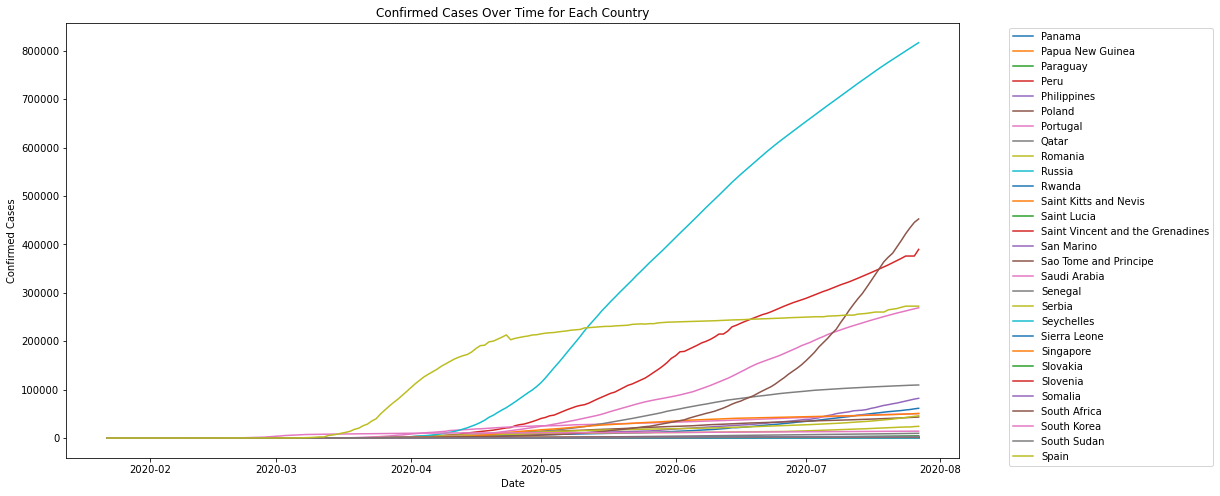

In [16]:
group_data['Date'] = pd.to_datetime(group_data['Date'])

# Plotting with Matplotlib
plt.figure(figsize=(16, 8))

for i, country in enumerate(group_data['Country/Region'].unique()):
    country_data = group_data[group_data['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country)

plt.title('Confirmed Cases Over Time for Each Country')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


- The trend in the data is that all countries recorded zero in february which makes sense as we started seeing many countries going on lockdown after March.
- Spain started recording cases at the end of march going to april and the no of cases remained steady throughout
- Russia started recording cases mid april and the cases spiked within short period of time recording extremely high numbers from the rest of the countries.
- most countries recorded roughly same amout of cases.

#### Plotting with Matplotlib/Seaborn:
1. Can you create a line plot showing the trend of confirmed cases over time for a specific country?
2. How does the number of confirmed cases compare between different countries? Can you visualize this comparison using a bar plot or a heatmap?



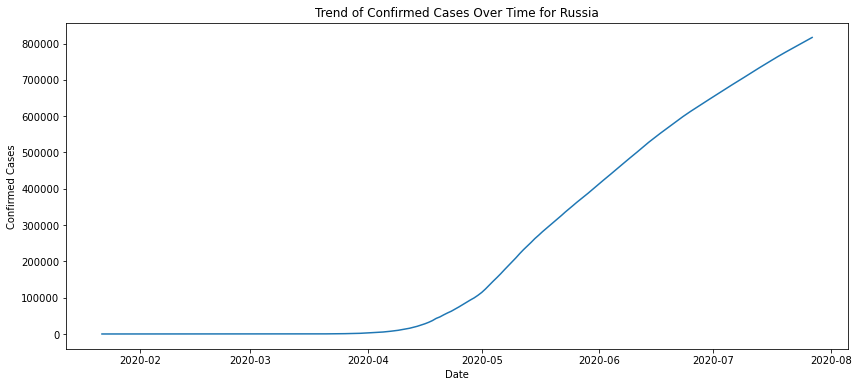

In [17]:
group_data['Date'] = pd.to_datetime(group_data['Date'])

# Filter data for a specific country
specific_country_data = group_data[group_data['Country/Region'] == 'Russia']

# Create a line plot for confirmed cases over time for the specific country
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Confirmed', data=specific_country_data)
plt.title('Trend of Confirmed Cases Over Time for Russia')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

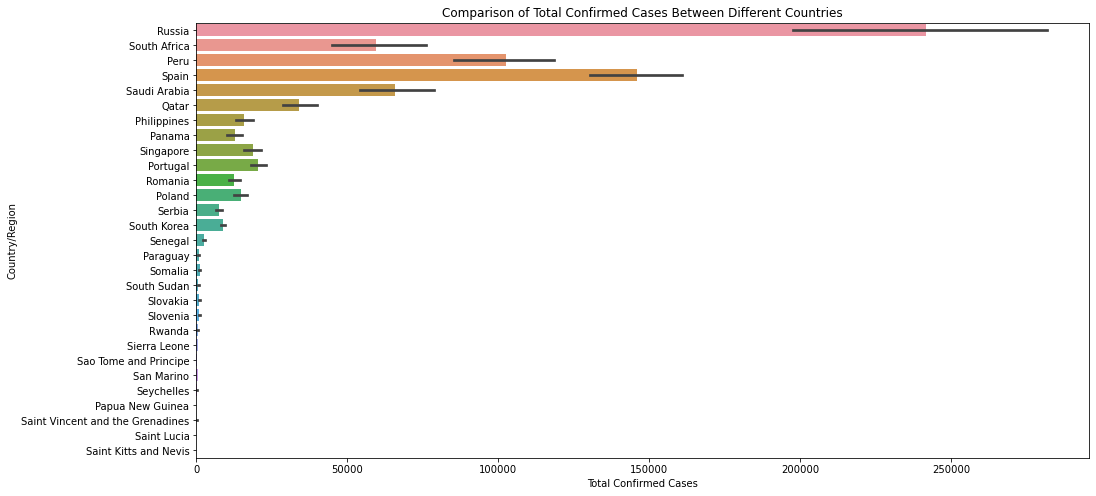

In [18]:
# Bar plot for total confirmed cases for each country
plt.figure(figsize=(16, 8))
sns.barplot(x='Confirmed', y='Country/Region', data=group_data.sort_values('Confirmed', ascending=False))
plt.title('Comparison of Total Confirmed Cases Between Different Countries')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country/Region')
plt.show()

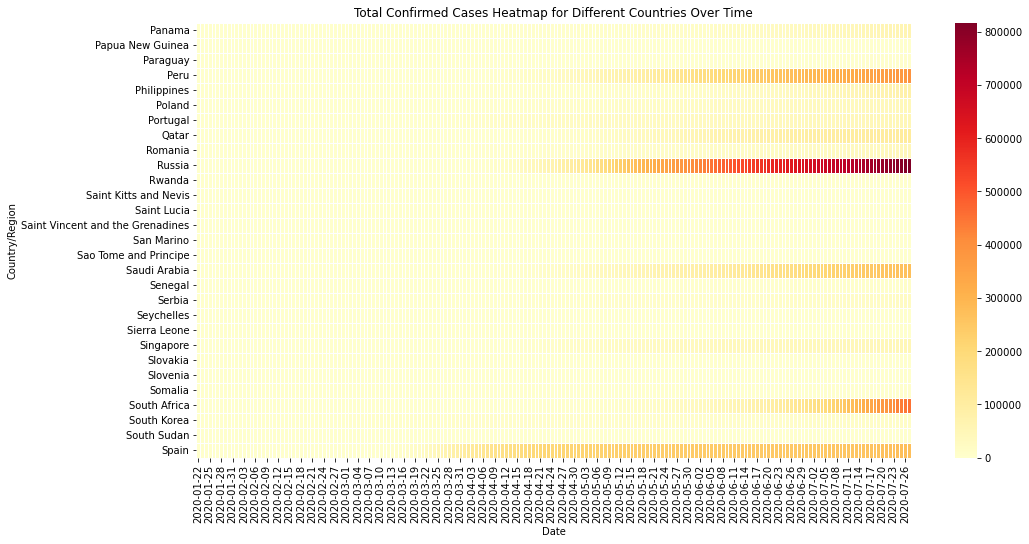

In [19]:
# Heatmap for total confirmed cases for each country and date
heatmap_data = pivot_table_data.pivot(index='Country/Region', columns='Date', values='Confirmed')
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5)
plt.title('Total Confirmed Cases Heatmap for Different Countries Over Time')
plt.xlabel('Date')
plt.ylabel('Country/Region')
plt.show()

### Bonus: 

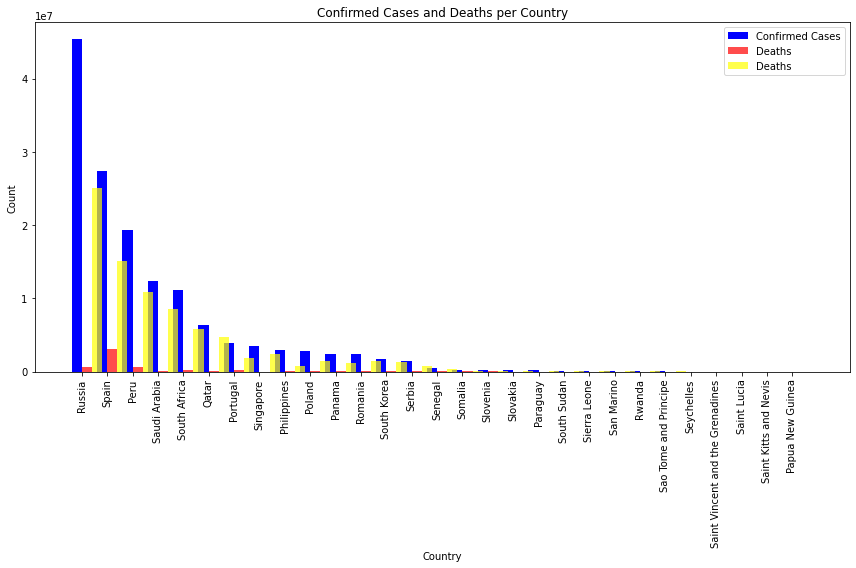

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the DataFrame by confirmed cases for better visualization
df_counts_sorted = df_counts.sort_values(by='Confirmed', ascending=False)

# Set the width of the bars
bar_width = 0.4

# Create an array of indices for each country
indices = np.arange(len(df_counts_sorted))

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(indices, df_counts_sorted['Confirmed'], width=bar_width, color='blue', label='Confirmed Cases')
plt.bar(indices + bar_width, df_counts_sorted['Deaths'], width=bar_width, color='red', label='Deaths', alpha=0.7)
plt.bar(indices+ bar_width+ bar_width , df_counts_sorted['Recovered'], width=bar_width, color='yellow', label='Deaths', alpha=0.7)

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Confirmed Cases and Deaths per Country')
plt.xticks(indices + bar_width / 2, df_counts_sorted['Country/Region'], rotation=90)  # Adjust x-axis positions and rotate country names
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


1. Are there any outliers in the dataset that might indicate errors or anomalies?
2. Can you perform any additional analyses or visualizations that provide insights into the COVID-19 data for your assigned countries?

In [21]:
#Find the country with the most& least confirmed cases

most_cases_country = df_counts.loc[df_counts['Confirmed'].idxmax()]['Country/Region']
most_cases_count = df_counts['Confirmed'].max()

least_cases_country = df_counts.loc[df_counts['Confirmed'].idxmin()]['Country/Region']
least_cases_count = df_counts['Confirmed'].min()

print(f"The country with the most confirmed cases is {most_cases_country} with {most_cases_count} cases.")
print(f"The country with the least confirmed cases is {least_cases_country} with {least_cases_count} cases.")

The country with the most confirmed cases is Russia with 45408411 cases.
The country with the least confirmed cases is Papua New Guinea with 1185 cases.


In [22]:
#Find the country with the most& least deaths

most_cases_country = df_counts.loc[df_counts['Deaths'].idxmax()]['Country/Region']
most_cases_count = df_counts['Deaths'].max()

least_cases_country = df_counts.loc[df_counts['Deaths'].idxmin()]['Country/Region']
least_cases_count = df_counts['Deaths'].min()

print(f"The country with the most deaths cases is {most_cases_country} with {most_cases_count} cases.")
print(f"The country with the least+ deaths cases is {least_cases_country} with {least_cases_count} cases.")

The country with the most deaths cases is Spain with 3033030 cases.
The country with the least+ deaths cases is Saint Kitts and Nevis with 0 cases.


In [23]:
#Find the country with the most& least recovered cases

most_cases_country = df_counts.loc[df_counts['Recovered'].idxmax()]['Country/Region']
most_cases_count = df_counts['Recovered'].max()

least_cases_country = df_counts.loc[df_counts['Recovered'].idxmin()]['Country/Region']
least_cases_count = df_counts['Recovered'].min()

print(f"The country with the most recovered cases is {most_cases_country} with {most_cases_count} cases.")
print(f"The country with the least recovered cases is {least_cases_country} with {least_cases_count} cases.")

The country with the most recovered cases is Russia with 25120448 cases.
The country with the least recovered cases is Papua New Guinea with 695 cases.


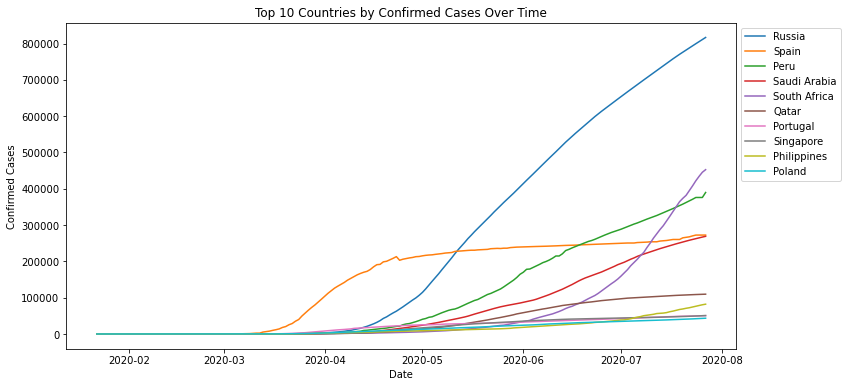

In [24]:
# Group by 'Country/Region' and sum the 'Confirmed' cases
total_confirmed_per_country = group_data.groupby('Country/Region')['Confirmed'].sum()

# Get the top 10 and bottom 10 countries
top_10_countries = total_confirmed_per_country.nlargest(10)
bottom_10_countries = total_confirmed_per_country.nsmallest(10)

# Combine the top and bottom countries for plotting
selected_countries = pd.concat([top_10_countries, bottom_10_countries])

# Plotting
plt.figure(figsize=(12, 6))
for country in top_10_countries.index:
    plt.plot(group_data[group_data['Country/Region'] == country]['Date'], group_data[group_data['Country/Region'] == country]['Confirmed'], label=country)

plt.title('Top 10 Countries by Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

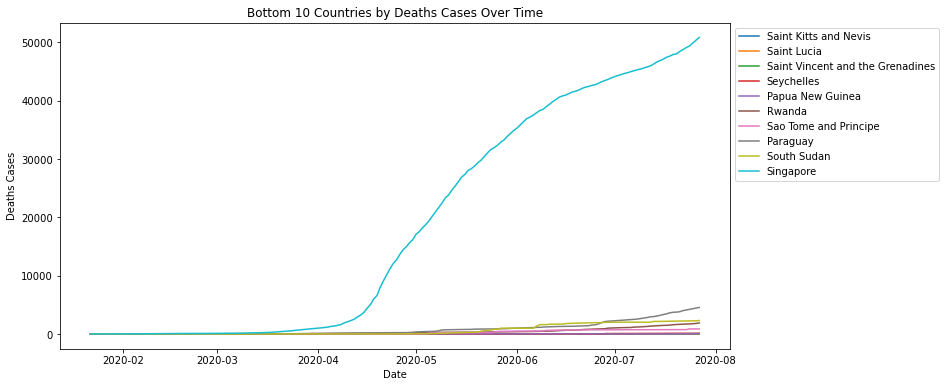

In [25]:
# Group by 'Country/Region' and sum the 'Confirmed' cases
total_confirmed_per_country = group_data.groupby('Country/Region')['Deaths'].sum()

# Get the top 10 and bottom 10 countries
top_10_countries = total_confirmed_per_country.nlargest(10)
bottom_10_countries = total_confirmed_per_country.nsmallest(10)

# Combine the top and bottom countries for plotting
selected_countries = pd.concat([top_10_countries, bottom_10_countries])

# Plotting
plt.figure(figsize=(12, 6))
for country in bottom_10_countries.index:
    plt.plot(group_data[group_data['Country/Region'] == country]['Date'], group_data[group_data['Country/Region'] == country]['Confirmed'], label=country)

plt.title('Bottom 10 Countries by Deaths Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Deaths Cases')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

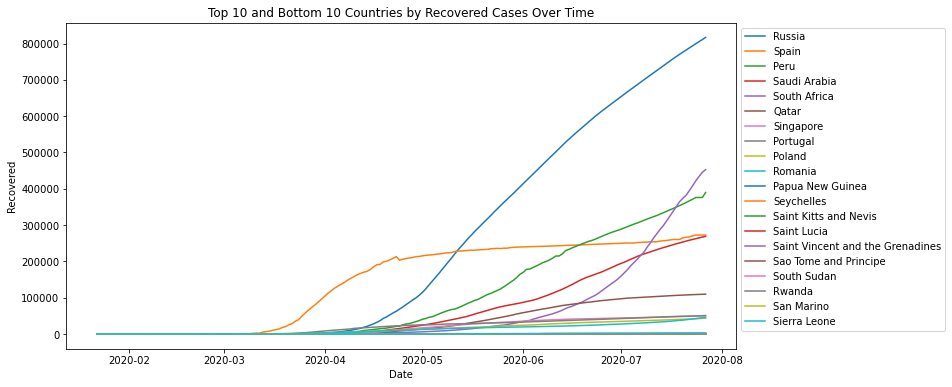

In [26]:
# Group by 'Country/Region' and sum the 'Confirmed' cases
total_confirmed_per_country = group_data.groupby('Country/Region')['Recovered'].sum()

# Get the top 10 and bottom 10 countries
top_10_countries = total_confirmed_per_country.nlargest(10)
bottom_10_countries = total_confirmed_per_country.nsmallest(10)

# Combine the top and bottom countries for plotting
selected_countries = pd.concat([top_10_countries, bottom_10_countries])

# Plotting
plt.figure(figsize=(12, 6))
for country in selected_countries.index:
    plt.plot(group_data[group_data['Country/Region'] == country]['Date'], group_data[group_data['Country/Region'] == country]['Confirmed'], label=country)

plt.title('Top 10 and Bottom 10 Countries by Recovered Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Recovered')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### Recovery and Motality Rate

In [27]:
# Recovery Rate function
def recovery_rate(Confirmed,Recovered):
    if Confirmed ==0:
        return(0.0)
    else:
        recovery_rate=(Recovered/Confirmed)*100
        return round(recovery_rate,2)
            
    

In [28]:
# Mortality Rate function
def motarlity_rate(Confirmed,Deaths):
    if Confirmed ==0:
        return(0.0)
    else:
        motarlity_rate=(Recovered/Deaths)*100
        return round(motarlity_rate,2)
            

In [29]:
#Apply recovery rate function
df_counts['Recovery Rate'] = df_counts.apply(lambda row: recovery_rate(row['Confirmed'], row['Recovered']), axis=1)
print(df_counts)


                      Country/Region  Confirmed   Deaths  Recovered  \
0                             Panama    2378126    51756    1213644   
1                   Papua New Guinea       1185        2        695   
2                           Paraguay     156373     1663      75800   
3                               Peru   19263916   652113   10862846   
4                        Philippines    2972611   110892     785042   
5                             Poland    2755525   118018    1465856   
6                           Portugal    3855363   146603    1809966   
7                              Qatar    6377607     7123    4676443   
8                            Romania    2363132   140031    1409409   
9                             Russia   45408411   619385   25120448   
10                            Rwanda      71242      169      36974   
11             Saint Kitts and Nevis       1772        0       1295   
12                       Saint Lucia       2236        0       1860   
13  Sa

In [30]:
#Find the country with the high& low recovery rate

high_recoveryRate_country = df_counts.loc[df_counts['Recovery Rate'].idxmax()]['Country/Region']
high_recoveryRate_count = df_counts['Recovery Rate'].max()

least_recoveryRate_country = df_counts.loc[df_counts['Recovery Rate'].idxmin()]['Country/Region']
least_recoveryRate_count = df_counts['Recovery Rate'].min()

print(f"The country with the highest recovery rate is {high_recoveryRate_country} with {high_recoveryRate_count} %.")
print(f"The country with the lowest recovery rate is {least_cases_country} with {least_cases_count} %.")

The country with the highest recovery rate is Saint Lucia with 83.18 %.
The country with the lowest recovery rate is Papua New Guinea with 695 %.


In [31]:
df_counts['Mortality Rate'] = df_counts.apply(lambda row: recovery_rate(row['Confirmed'], row['Deaths']), axis=1)
print(df_counts)

                      Country/Region  Confirmed   Deaths  Recovered  \
0                             Panama    2378126    51756    1213644   
1                   Papua New Guinea       1185        2        695   
2                           Paraguay     156373     1663      75800   
3                               Peru   19263916   652113   10862846   
4                        Philippines    2972611   110892     785042   
5                             Poland    2755525   118018    1465856   
6                           Portugal    3855363   146603    1809966   
7                              Qatar    6377607     7123    4676443   
8                            Romania    2363132   140031    1409409   
9                             Russia   45408411   619385   25120448   
10                            Rwanda      71242      169      36974   
11             Saint Kitts and Nevis       1772        0       1295   
12                       Saint Lucia       2236        0       1860   
13  Sa

In [32]:
#Find the country with the high& low recovery rate

high_mortalityRate_country = df_counts.loc[df_counts['Mortality Rate'].idxmax()]['Country/Region']
high_mortalityRate_count = df_counts['Mortality Rate'].max()

low_mortalityRate_country = df_counts.loc[df_counts['Mortality Rate'].idxmin()]['Country/Region']
low_mortalityRate_count = df_counts['Mortality Rate'].min()

print(f"The country with the highest mortaliry rate is {high_mortalityRate_country} with {high_mortalityRate_count} %.")
print(f"The country with the lowest mortaliry rate is {low_mortalityRate_country} with {low_mortalityRate_count} %.")

The country with the highest mortaliry rate is Spain with 11.07 %.
The country with the lowest mortaliry rate is Saint Kitts and Nevis with 0.0 %.
